In [92]:
cd ..

/Users/lfinkbeiner/Documents/GitHub/AY121/lab2


In [93]:
%run synthesis

In [94]:
cd analyses

/Users/lfinkbeiner/Documents/GitHub/AY121/lab2/analyses


In [95]:
'''
The width 'a' was measured with calipers to be about 22.29 mm +- .01 mm

max of open?: "3.98 mV" but this should be a square unit
max of shorted?: "1.42 mv" agan, should be square
'''
# All numbers are given in GHz
nulls = {}
nulls['open3'] = np.array([4.45, 9.55, 14.50, 19.40, 24.30, 29.35, 34.45, 39.55, 44.6, 49.5])
nulls['short3'] = np.array([5.45, 10.4, 15.35, 20.5, 25.6, 30.35, 35.6, 40.25, 45.5])

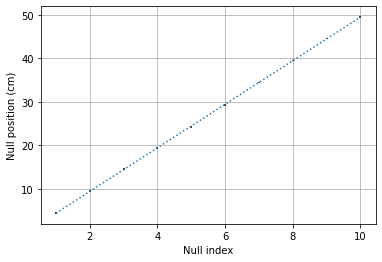

In [96]:
indices = np.array([1., 2., 3., 4., 5., 6., 7., 8., 9., 10.])
#plt.scatter(indices, nulls['open3'])
plt.errorbar(indices, nulls['open3'], yerr = .2, color='k', linestyle='')
plt.plot(indices, indices * fit(nulls['open3'])[0] + fit(nulls['open3'])[1], linestyle='dotted')
plt.xlabel('Null index')
plt.ylabel('Null position (cm)')
plt.grid()

You have your work cut out for you? The error bars seem far too small, and the discrepancy between prediction and observation is imperceptible.

In [97]:
def differences(L):
    return [L[i + 1] - L[i] for i in range(len(L) - 1)]

print('Quick calculation:', np.mean(differences(nulls['open3'])))
print('Rigorous calculation:', fit(nulls['open3'])[0])

Quick calculation: 5.005555555555556
Rigorous calculation: 5.007575757575756


In [98]:
nulls['7'] = np.array([8.8, 15.15])
nulls['7.1'] = np.array([10.5, 16.35])
nulls['7.2'] = np.array([11.95, 17.15])
nulls['7.3'] = np.array([12.65, 17.4])

nulls['open7.5'] = np.array([10.05, 14.4])
nulls['short7.5'] = np.array([11.15, 15.35])

nulls['7.6'] = np.array([10.85, 14.75])
nulls['7.7'] = np.array([11.65, 15.45])
nulls['7.8'] = np.array([8.7, 12.25, 15.85])
nulls['7.9'] = np.array([9.5, 13.35, 16.3])

nulls['8'] = np.array([10.15, 13.35, 16.7])
nulls['8.5'] = np.array([9.85, 12.7, 15.25])
nulls['9'] = np.array([9.3, 12.3, 14.25, 16.7])
nulls['9.25'] = np.array([10.15, 12.45, 14.85, 17.2])
nulls['9.5'] = np.array([8.9, 11.15, 13.35, 15.45, 17.7])
nulls['9.75'] = np.array([9.75, 11.8, 14.25, 16.05])
nulls['10'] = np.array([8.45, 10.45, 12.3, 14.35, 16.5])
nulls['10.5'] = np.array([9.95, 11.75, 13.5, 15.45, 17.3])
nulls['11'] = np.array([9.35, 11.4, 12.65, 14.45, 16.2, 17.85])
nulls['11.5'] = np.array([8.95, 10.45, 12, 13.8, 15.15, 16.8])
nulls['12'] = np.array([8.4, 9.85, 11.35, 12.85, 14.4, 15.9, 17.45])

In [99]:
# Do we start numbering the nulls at one or zero??
# Degree one: we demand a straight line
open3fit = np.polyfit(null_range(len(nulls['open3'])), nulls['open3'], 1)
v_open3 = open3fit[0] * 3e9
v_open3 / 3e10

0.5007575757575756

In [100]:
xband_y = fs(np.array([7, 7.1, 7.2, 7.3, 7.5, 7.6, 7.7, 7.8, 7.9, 8, 8.5, 9, 9.25, 9.5, 9.75, 10, 10.5, 11, 11.5, 12]))
xband_x = []

frqs = [7., 7.1, 7.2, 7.3, 7.5, 7.6, 7.7, 7.8, 7.9, 8., 8.5, 9, 9.25, 9.5,
           9.75, 10, 10.5, 11, 11.5, 12]

xband_x.append(length(nulls['7'], 7))
xband_x.append(length(nulls['7.1'], 7.1))
xband_x.append(length(nulls['7.2'], 7.2))
xband_x.append(length(nulls['7.2'], 7.3))

xband_x.append(length(nulls['open7.5'], 7.5))

xband_x.append(length(nulls['7.6'], 7.6))
xband_x.append(length(nulls['7.7'], 7.7))
xband_x.append(length(nulls['7.8'], 7.8))
xband_x.append(length(nulls['7.9'], 7.9))

xband_x.append(length(nulls['8'], 8))
xband_x.append(length(nulls['8.5'], 8.5))
xband_x.append(length(nulls['9'], 9))
xband_x.append(length(nulls['9.25'], 9.25))
xband_x.append(length(nulls['9.5'], 9.5))
xband_x.append(length(nulls['9.75'], 9.75))
xband_x.append(length(nulls['10'], 10))
xband_x.append(length(nulls['10.5'], 10.5))
xband_x.append(length(nulls['11'], 11))
xband_x.append(length(nulls['11.5'], 11.5))
xband_x.append(length(nulls['12'], 12))
xband_x

[6.35,
 5.850000000000002,
 5.199999999999999,
 5.199999999999999,
 4.3500000000000005,
 3.8999999999999995,
 3.799999999999998,
 3.575,
 3.3999999999999977,
 3.274999999999998,
 2.699999999999998,
 2.415,
 2.355000000000001,
 2.1899999999999995,
 2.1350000000000007,
 2.000000000000001,
 1.8400000000000005,
 1.6771428571428568,
 1.5757142857142856,
 1.5107142857142866]

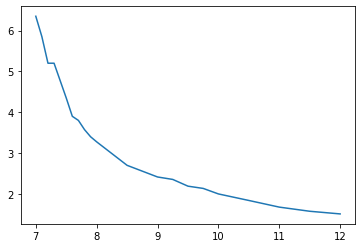

In [101]:
plt.plot(frqs, xband_x)
plt.show()

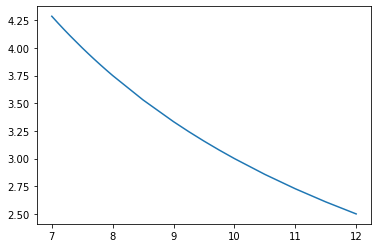

In [102]:
plt.plot(frqs, xband_y)
plt.show()

Tutorials:
https://github.com/AaronParsons/ugradio/blob/master/jupyter_tutorials/lab2/Central%20Limit%20Theorem%20and%20Averaging.ipynb

https://github.com/AaronParsons/ugradio/blob/master/jupyter_tutorials/lab2/chisq_intro.ipynb

In [148]:
def a_tester(a):
    return xband_y / np.sqrt(1 - np.divide(xband_y, 2 * a) ** 2) / xband_x

In [149]:
def chisq_noerr(a):
    return np.sum(np.abs(1 - a_tester(a))**2)

In [150]:
import scipy.optimize
minzd = scipy.optimize.fmin(chisq_noerr, 5)
print('a =', np.around(minzd, 5))

Optimization terminated successfully.
         Current function value: 2.413197
         Iterations: 68
         Function evaluations: 174
a = [1.00663301e+08]


Below this point we will be restricting ourselves to data enumerated in the report.

In [151]:
frequencies = np.array([7, 7.2, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12])

xband_y = lamb_fs = fs(frequencies)

xband_x = lamb_g = np.array([
    length(nulls['7'], 7),
    length(nulls['7.2'], 7.2),
    length(nulls['open7.5'], 7.5),
    length(nulls['8'], 8),
    length(nulls['8.5'], 8.5),
    length(nulls['9'], 9),
    length(nulls['9.5'], 9.5),
    length(nulls['10'], 10),
    length(nulls['10.5'], 10.5),
    length(nulls['11'], 11),
    length(nulls['11.5'], 11.5),
    length(nulls['12'], 12),
])

lamb_g

array([6.35      , 5.2       , 4.35      , 3.275     , 2.7       ,
       2.415     , 2.19      , 2.        , 1.84      , 1.67714286,
       1.57571429, 1.51071429])

In [152]:
minzd = scipy.optimize.fmin(chisq_noerr, 5)
a_hat = np.around(minzd, 5)
a_hat

Optimization terminated successfully.
         Current function value: 2.413197
         Iterations: 68
         Function evaluations: 174


array([1.00663301e+08])

In [153]:
def width_to_wave(a, frees):
    '''
    @frees = free-space wavelength
    '''
    return frees / np.sqrt(1 - np.divide(frees, 2 * a) ** 2)

In [158]:
yhat = width_to_wave(a_hat, lamb_fs[2:])
print(yhat)
# Why is there a factor of two here?
# It shows that you made a mistake somewhere else, surely.
print(lamb_g[2:])
print(a_hat)

[4.         3.75       3.52941176 3.33333333 3.15789474 3.
 2.85714286 2.72727273 2.60869565 2.5       ]
[4.35       3.275      2.7        2.415      2.19       2.
 1.84       1.67714286 1.57571429 1.51071429]
[1.00663301e+08]


In [155]:
red_chi(10, 1, .8, lamb_g[2:], yhat)

1.3887663666785768